### **Import Libraries**

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

### **Load Data**

In [179]:
df = pd.read_csv('egfr_02_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df_x = df.drop('pIC50', axis=1)
df_y = df.pIC50
orig_cols = df_x.shape[1]  
print(df_x.shape, df_y.shape)

(106, 881) (106,)


### **Remove low variace features**
Using a binary variance threshold calculated as p(1-p) where p is the weighted proporation of 1s

In [180]:
p = 0.8
threshold  = (p * (1-p))
selection = VarianceThreshold(threshold)
df_x = selection.fit_transform(df_x)
upd_cols = df_x.shape[1]  
print(f"Removed {orig_cols-upd_cols} features!")

Removed 740 features!


### **Split into training and testing data**
*80/20 split*

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.2)

### **Random Forest Regression Model [Great Source](https://www.youtube.com/watch?time_continue=4&v=RUEFSwN-orQ&embeds_referring_euri=https%3A%2F%2Fwww.google.com%2F&source_ve_path=Mjg2NjY&feature=emb_logo)**

In [182]:
import numpy as np
np.random.seed(3598759837) # For reproducibility
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r_squared = model.score(X_test,Y_test)
r_squared


0.12311833791788507

### **Experimental vs Predicted pIC50 values**

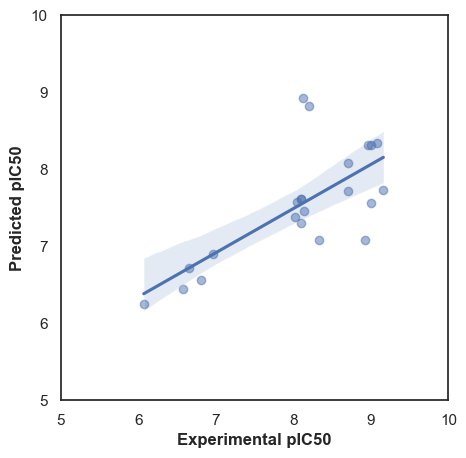

In [184]:
Y_pred = model.predict(X_test)

sns.set_theme(color_codes=True)
sns.set_style('white')

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('Experimental pIC50', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontweight='bold')
ax.set_xlim(5,10)
ax.set_ylim(5,10)
ax.figure.set_size_inches(5,5)
plt.show()
